# Example 3: Tracking of multiple particles with DeepTrack 1.0

Example code to use DeepTrack to track multiple particles.
See also Figure 3.

<strong>DeepTrack 1.0</strong><br/>
Digital Video Microscopy enhanced with Deep Learning<br/>
version 1.0 - 30 November 2018<br/>
© Saga Helgadottir, Aykut Argun & Giovanni Volpe<br/>
[Soft Matter Lab](http://www.softmatterlab.org)

## 1. INITIALIZATION

In [1]:
import deeptrack

## 2. PLAY VIDEO TO BE TRACKED

The video to be tracked is played. 

Video file: DeepTrack - Example 3 - Brownian Particles.mp4

Note that the video file must be in the same folder as this notebook.

In [2]:
%%HTML

<video width="400" height="400" controls>
<source src="DeepTrack - Example 3 - Brownian Particles.mp4" type="video/mp4">
</video>

## 3. CHECK IMAGE GENERATION ROUTINE

Here, we simulate images of multiple particles similar to those we want to track. In this case, we simulate images with two particles: The first particle position is chosen randomly from a normal distribution with mean of 0 and standard deviation of 10 pixels, and the other is positioned between 15 and 35 pixels from the center. Both particles have a radius between 4 and 6 pixels, and a point-spread function obtained from the combination of a Bessel functions of first and second order of positive and negative intensity respectively. The image background, SNR and gradient intensity are randomly selected from a wide range of values. This results in particle images with a dark ring around a bright center on a brigth or dark background with varying SNR and gradient intensity. This image generator was used to train the pretraiend network saved in the file "DeepTrack - Example 3 - Pretrained network.h5".

Comments:
1. The <strong>image_parameters_function</strong> is a lambda function that determines the kind of particle images for which the deep learning network will be trained. Tuning its parameters is the simplest way to improve the tracking performance.<br/>
2. The <strong>image_generator</strong> is a lambda function that works as image genrator. It does not need to be changed in most cases.<br/>
3. The parameter <strong>number_of_images_to_show</strong> determines the number of sample images that are shown.
4. The <font color=red><strong>red<strong></font> symbol superimposed to the images represents the ground truth particle position.

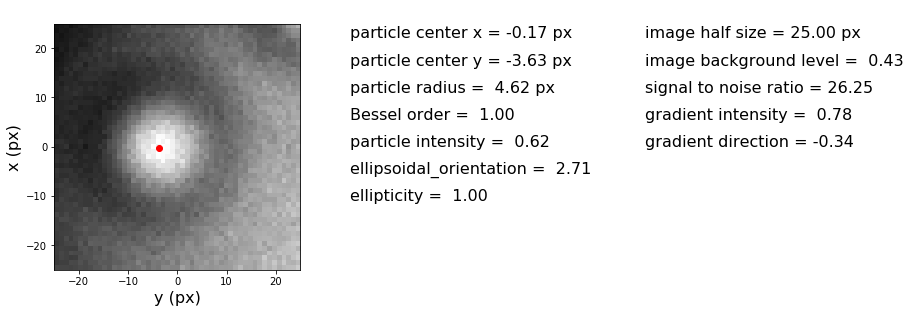

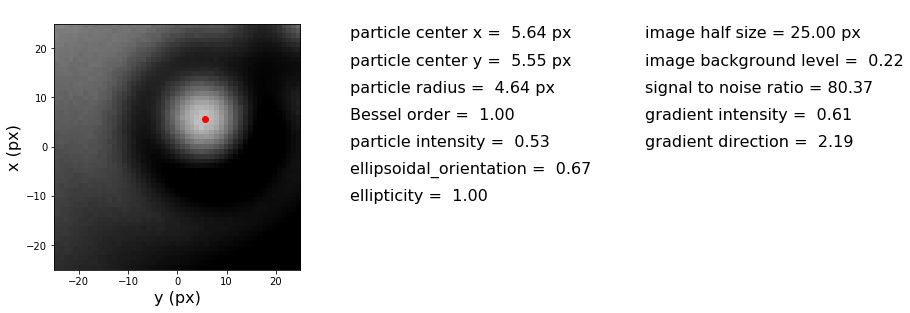

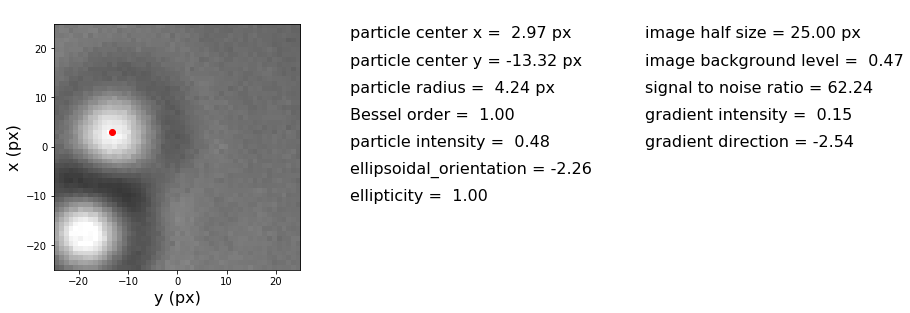

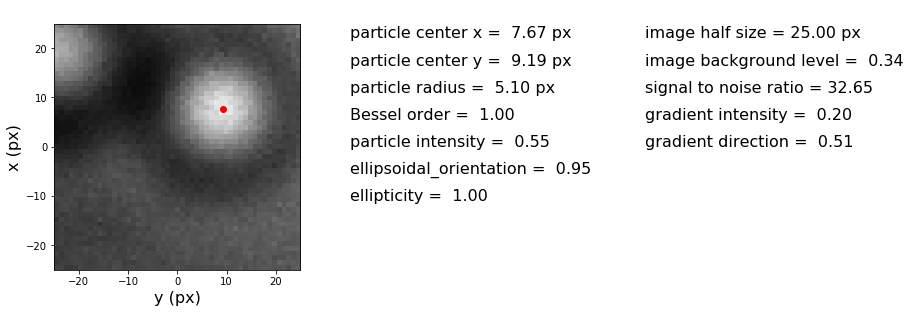

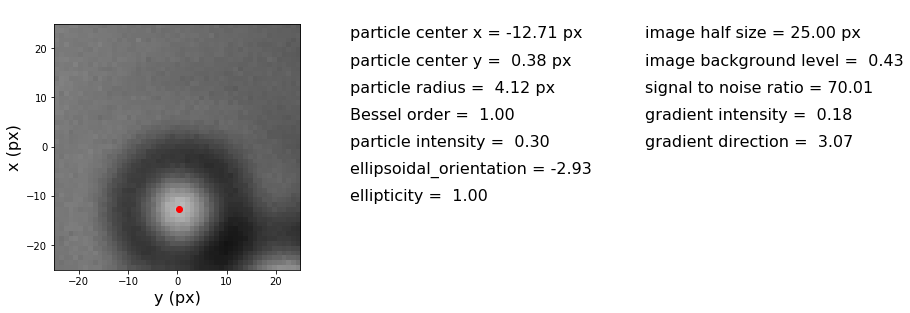

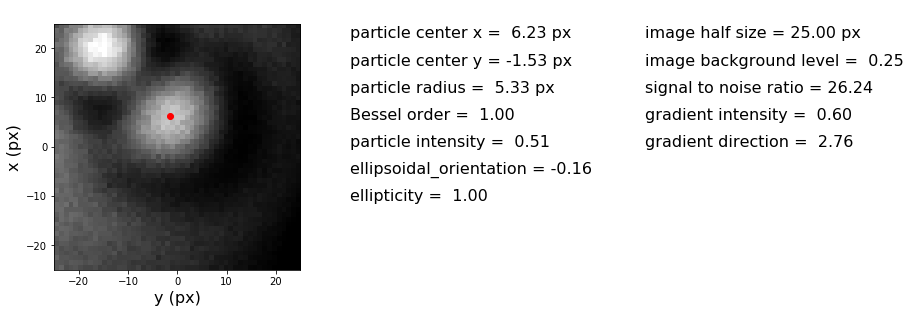

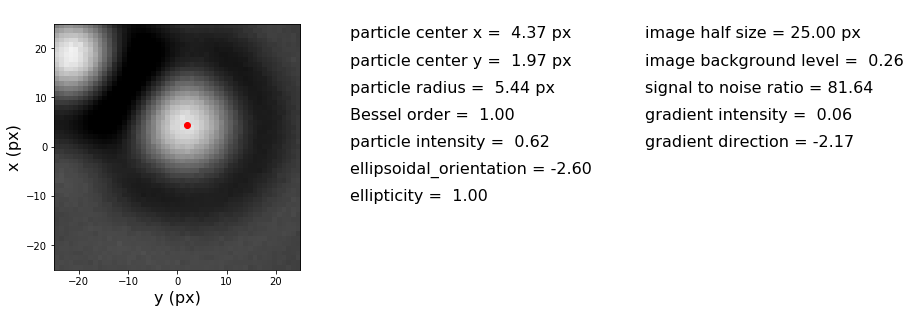

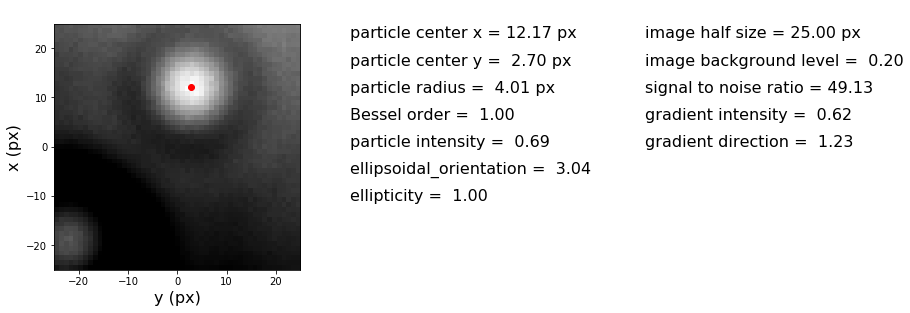

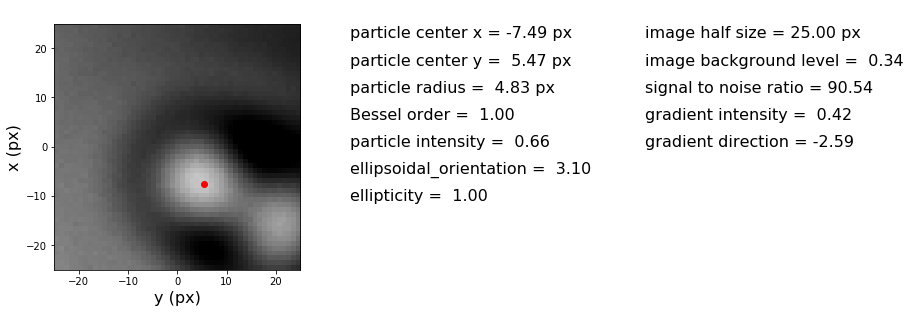

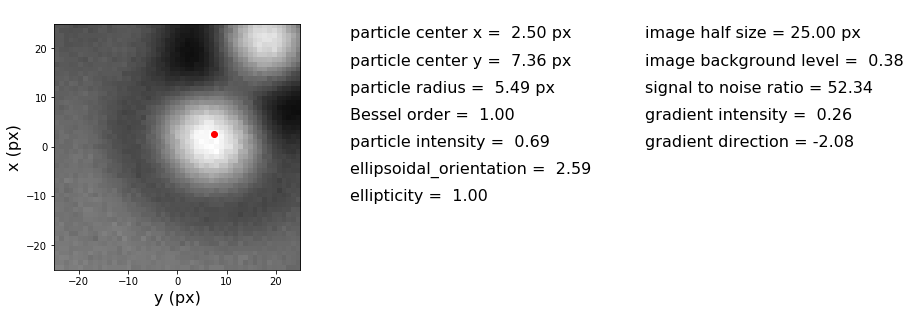

In [3]:
### Define image properties
%matplotlib inline
from numpy.random import randint, uniform, normal, choice
from math import pi

particle_number = 2

image_parameters_function = lambda : deeptrack.get_image_parameters(
    particle_center_x_list=lambda : [normal(0 ,10, 1), 
                                     choice([int(uniform(-35, -15, 1)), int(uniform(15, 35, 1))])],
    particle_center_y_list=lambda : [normal(0 ,10, 1), 
                                     choice([int(uniform(-35, -15, 1)), int(uniform(15, 35, 1))])],
    particle_radius_list=lambda : uniform(4, 6, particle_number),
    particle_bessel_orders_list=lambda : [[1, 2], [1, 2]],
    particle_intensities_list=lambda : [[uniform(0.3, 0.7, 1), -uniform(0.2, 0.4, 1)], 
                                        [uniform(0.3, 0.7, 1), -uniform(0.3, 0.4, 1)]],
    image_half_size=lambda : 25,
    image_background_level=lambda : uniform(.2, .5),
    signal_to_noise_ratio=lambda : uniform(5, 100),
    gradient_intensity=lambda : uniform(0, 0.8),
    gradient_direction=lambda : uniform(-pi, pi),
    ellipsoidal_orientation=lambda : uniform(-pi, pi, particle_number),
    ellipticity=lambda : 1)

### Define image generator
image_generator = lambda : deeptrack.get_image_generator(image_parameters_function)

### Show some examples of generated images
number_of_images_to_show = 10

for image_number, image, image_parameters in image_generator():
    if image_number>=number_of_images_to_show:
        break
    
    deeptrack.plot_sample_image(image, image_parameters)

## 4. USE A PRETRAINED DEEP LEARNING NETWORK

The pretraiend network saved in the file "DeepTrack - Example 3 - Pretrained network.h5" is loaded and its performance is tested on a selected video.

Video file: DeepTrack - Example 3 - Brownian Particles.mp4


Note that the file "DeepTrack - Example 3 - Pretrained network.h5" and the video file must be in the same folder as this notebook.

Comments:
1. <strong>number_frames_to_be_tracked</strong> can be changed to track different number of frames. If number_frames is equal to 0 then the whole video is tracked.
2. <strong>box_half_size</strong> is half the size of the box to be scanned over the frames. The resulting sample should be comparable to the training image.
3. <strong>box_scanning_step</strong> is the step that is used to scan the box over the frame. It can be increased for higher accuracy or decreased for lower computational time.

In [4]:
### Define the video file to be tracked
video_file_name = 'DeepTrack - Example 3 - Brownian Particles.mp4'

### Define the number of frames to be tracked
number_frames_to_be_tracked = 2

### Define the size of the box to be scanned over the frames
box_half_size = 25 

### Define the scanning step over the frame
box_scanning_step = 5 

### Preprocess the images
frame_normalize = 0
frame_enhance = 1

### Load the pretrained network
saved_network_file_name = 'DeepTrack - Example 3 - Pretrained network.h5'
network = deeptrack.load(saved_network_file_name)

### Track the video
(number_tracked_frames, frames, predicted_positions_wrt_frame, predicted_positions_wrt_box, boxes_all) = deeptrack.track_video(
    video_file_name, 
    network, 
    number_frames_to_be_tracked, 
    box_half_size, 
    box_scanning_step,
    frame_normalize,
    frame_enhance)

Using TensorFlow backend.


## 5. SHOW EXAMPLES OF TRACKED SCANNING BOXES

The tracked scanning boxes are plotted over a range of frames, rows and columns.

Comments:
1. <strong>frame_to_be_shown</strong> can be changed to view different frames.
2. <strong>rows_to_be_shown</strong> can be changed to view different rows of each of the frames.
3. <strong>columns_to_be_shown</strong> can be changed to view different columns of each of the frames.
4. The <font color=blue><strong>blue<strong></font> symbol is the deep learning network prediction for the position (x, y). 



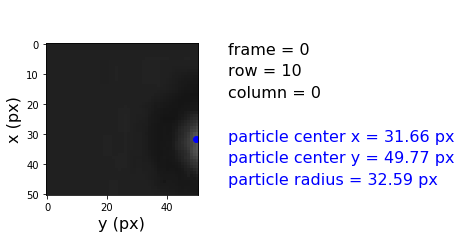

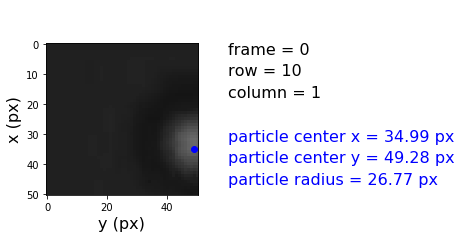

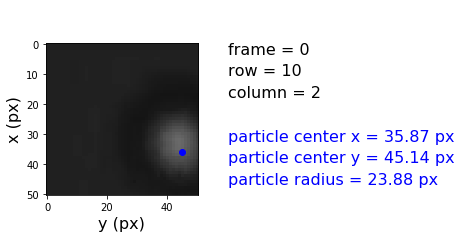

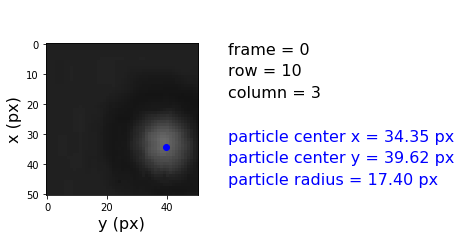

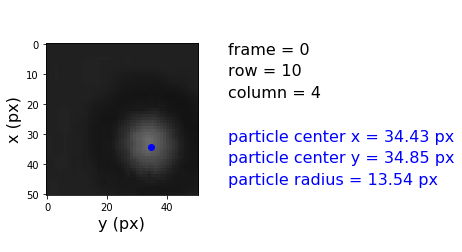

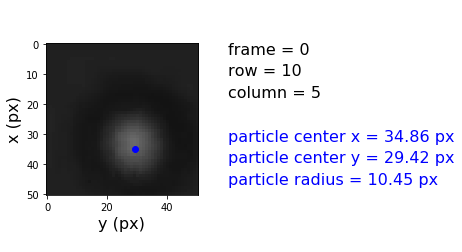

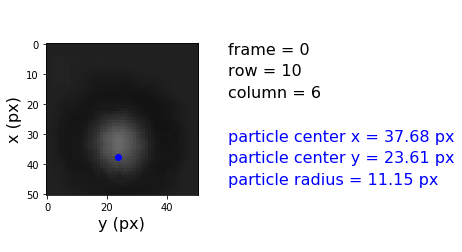

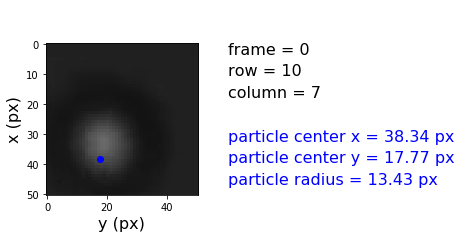

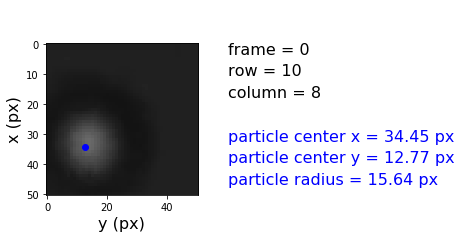

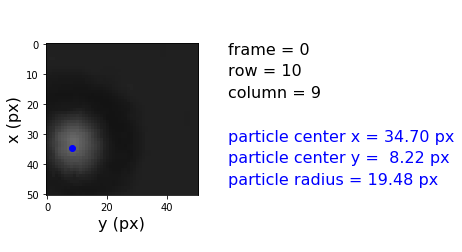

In [5]:
%matplotlib inline
### Define frames, rows and columns of the samples to be shown
frames_to_be_shown = range(1)
rows_to_be_shown = range(10,11)
columns_to_be_shown = range(10)

### Show boxes
deeptrack.plot_tracked_scanning_boxes(
    frames_to_be_shown, 
    rows_to_be_shown, 
    columns_to_be_shown, 
    boxes_all, 
    predicted_positions_wrt_box)

## 6. SHOW EXAMPLES OF TRACKED FRAMES

The tracked frames are shown. 

Comments:
1. <strong>particle_radial_distance_threshold</strong> can be changed to choose which prediction points (<font color=blue><strong>blue<strong></font> dots) are to be used to calculate the centroid positions (<font color='#e6661a'><strong>orange<strong></font> circles). We used 7.5 pixels. 
2. <strong>particle_maximum_interdistance</strong> can be changed to choose what predicted points (<font color=blue><strong>blue<strong></font> dots) belong to the same particle. We used 15 pixels. 

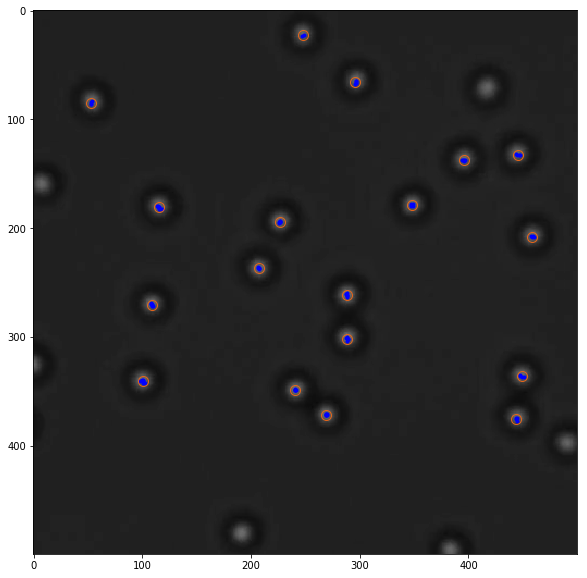

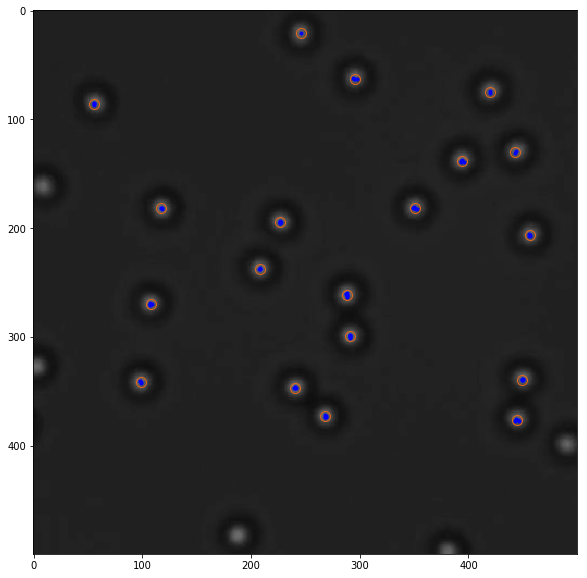

In [6]:
### Define minimum radial distance from the center of the scanning boxes (maximum 10 frames at a time)
particle_radial_distance_threshold = 7.5 

### Define the minumum distance between predicted scanning points for them belonging to the same particle
particle_maximum_interdistance = 15 

### Visualize tracked frames
deeptrack.show_tracked_frames(
    particle_radial_distance_threshold, 
    particle_maximum_interdistance, 
    number_tracked_frames, 
    frames, 
    predicted_positions_wrt_frame)